In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture 

In [2]:
''' reading dataset '''
df = pd.read_csv("../input/pokemons-and-there-stats/pokemon_df.csv")

''' displaying first 10 rows of dataset '''
df.head(10)

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
5,Charmeleon,405,58,64,58,80,65,80
6,Charizard,534,78,84,78,109,85,100
7,Charizard,634,78,130,111,130,85,100
8,Charizard,634,78,104,78,159,115,100
9,Squirtle,314,44,48,65,50,64,43


In [3]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


In [4]:
''' taking two rows only '''
df_ = df[['Attack','Defence']]

In [5]:
def do_agglomerative(X, nclust=2):
    m = AgglomerativeClustering(n_clusters=nclust,affinity='euclidean',linkage='ward')
    cluster_labels = m.fit_predict(X)
    return (cluster_labels)

''' calling do_agglomeratve function '''
cluster_labels = do_agglomerative(df_, 20)
agg = pd.DataFrame(clust_labels)
df_.insert((df_.shape[1]), 'agglomerative', agg)

In [6]:
df__ = df_
df__['Name'] = df['Name']
df__

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Attack,Defence,agglomerative,Name
0,49,49,2,Bulbasaur
1,62,63,13,Ivysaur
2,82,83,12,Venusaur
3,100,123,8,Venusaur
4,52,43,2,Charmander
...,...,...,...,...
1040,145,130,10,Glastrier
1041,65,60,13,Spectrier
1042,80,80,12,Calyrex
1043,165,150,10,Calyrex


In [7]:
for i in range(20):
    n = df__[df__['agglomerative'] == i]['Name'] 
    print('[ Agglomerative '+str(i)+' ]')
    print(list(set(n)))
    print()

[ Agglomerative 0 ]
['Onix', 'Deoxys', 'Carbink', 'Probopass', 'Aegislash', 'Shuckle', 'Registeel', 'Cofagrigus', 'Nosepass', 'Bastiodon', 'Toxapex', 'Cosmoem']

[ Agglomerative 1 ]
['Wurmple', 'Tentacool', 'Drifloon', 'Fennekin', 'Wishiwashi', 'Slugma', 'Snom', 'Noibat', 'Cosmog', 'Hoothoot', 'Sobble', 'Mime Jr.', 'Nickit', 'Scatterbug', 'Milcery', 'Electrike', 'Treecko', 'Spoink', 'Surskit', 'Rookidee', 'Kadabra', 'Goomy', 'Pidgey', 'Happiny', 'Impidimp', 'Blissey', 'Purrloin', 'Igglybuff', 'Azurill', 'Burmy', 'Lotad', 'Tyrogue', 'Zubat', 'Chansey', 'Sinistea', 'Flabébé', 'Helioptile', 'Pichu', 'Smeargle', 'Jynx', 'Sentret', 'Smoochum', 'Jigglypuff', 'Bounsweet', 'Solosis', 'Gastly', 'Clefairy', 'Combee', 'Wimpod', 'Ralts', 'Bidoof', 'Weedle', 'Abra', 'Wooper', 'Zigzagoon', 'Sunkern', 'Hoppip', 'Vulpix', 'Mareep', 'Woobat', 'Caterpie', 'Hatenna', 'Bunnelby', 'Ledyba', 'Salandit', 'Budew', 'Cleffa', 'Skitty', 'Feebas', 'Cutiefly', 'Munna', 'Wingull', 'Blipbug', 'Meowth', 'Kirlia', 'Fl

In [8]:
df_.groupby('agglomerative').mean()

,Attack,Defence
agglomerative,,
0,49.500000,155.500000
1,34.426829,34.060976
2,58.830508,42.432203
3,109.300000,204.500000
4,99.337662,79.155844
5,120.742857,74.014286
6,146.450000,54.700000
7,75.641509,104.490566
8,98.905660,125.150943


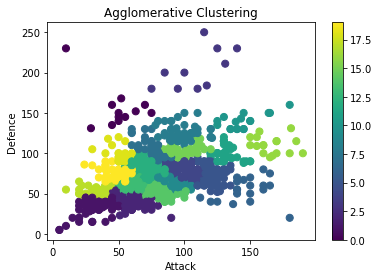

In [9]:
''' plotting scatter plot'''
figure = plt.figure()
ax = figure.add_subplot(111)
sc = ax.scatter(df_['Attack'], df_['Defence'], c=agglomerative[0], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Attack')
ax.set_ylabel('Defence')
plt.rcParams['figure.figsize'] = (6,5)
plt.colorbar(sc)

In [10]:
'''Group of attack ability max'''
names = df_[df_['agglomerative']==6]['Name']
print(list(names))

['Beedrill', 'Mewtwo', 'Blaziken', 'Sharpedo', 'Sharpedo', 'Banette', 'Absol', 'Deoxys', 'Deoxys', 'Cranidos', 'Rampardos', 'Darmanitan', 'Darmanitan', 'Darmanitan', 'Archen', 'Archeops', 'Greninja', 'Aegislash', 'Hoopa', 'Pheromosa']


In [11]:
f = []
for i in set(names):
    f += [i.lower() + '.png']
print(f)
print(len(f))

['beedrill.png', 'deoxys.png', 'greninja.png', 'hoopa.png', 'absol.png', 'rampardos.png', 'sharpedo.png', 'mewtwo.png', 'archen.png', 'aegislash.png', 'darmanitan.png', 'cranidos.png', 'blaziken.png', 'archeops.png', 'pheromosa.png', 'banette.png']
16


In [12]:
''' directory path '''
img_path ='../input/pokemon-images-and-types/images/images'

Text(0.5, 1.0, 'absol.png')

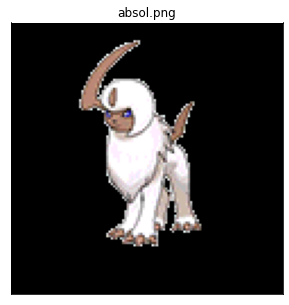

In [13]:
''' plotting 1st image '''
i = random.randrange(16)
f, ax = plt.subplots(1, 1, figsize=(5,5))
img = cv2.imread(os.path.join(img_path, f[i]))
ax.imshow(img)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(files[i])

In [14]:
''' Group of attack ability min '''
names2 = df_[df_['agglomerative'] == 17]['Name']
print(list(names2))

['Metapod', 'Kakuna', 'Seel', 'Voltorb', 'Staryu', 'Magikarp', 'Ledian', 'Togepi', 'Marill', 'Wobbuffet', 'Silcoon', 'Cascoon', 'Seedot', 'Shroomish', 'Meditite', 'Minun', 'Gulpin', 'Swablu', 'Baltoy', 'Wynaut', 'Spheal', 'Luvdisc', 'Cherubi', 'Chingling', 'Mantyke', 'Snivy', 'Venipede', 'Cottonee', 'Petilil', 'Gothita', 'Duosion', 'Frillish', 'Litwick', 'Lampent', 'Spewpa', 'Dewpider', 'Morelull', 'Steenee', 'Gossifleur', 'Wooloo', 'Rolycoly']


In [15]:
f2=[]
for i in set(names2):
    f2 += [i.lower() + '.png']
    
print(f2)
print(len(f2))

['wobbuffet.png', 'magikarp.png', 'litwick.png', 'marill.png', 'snivy.png', 'seel.png', 'luvdisc.png', 'baltoy.png', 'staryu.png', 'spheal.png', 'dewpider.png', 'swablu.png', 'ledian.png', 'gossifleur.png', 'shroomish.png', 'morelull.png', 'cottonee.png', 'chingling.png', 'silcoon.png', 'voltorb.png', 'seedot.png', 'frillish.png', 'meditite.png', 'togepi.png', 'wynaut.png', 'steenee.png', 'venipede.png', 'spewpa.png', 'cherubi.png', 'gothita.png', 'rolycoly.png', 'kakuna.png', 'minun.png', 'duosion.png', 'petilil.png', 'lampent.png', 'mantyke.png', 'gulpin.png', 'cascoon.png', 'wooloo.png', 'metapod.png']
41


Text(0.5, 1.0, 'meditite.png')

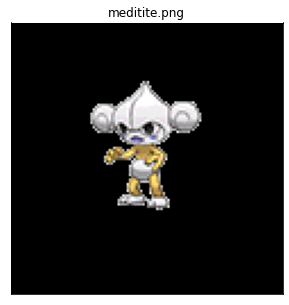

In [16]:
''' plotting 2nd image '''
j = random.randrange(41)
f, ax = plt.subplots(1,1, figsize=(5,5))
img = cv2.imread(os.path.join(img_dir,files2[j]))
ax.imshow(img)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(files2[i])